# Global Sales Trends and Regional Performance Analysis (2010–2011)

## Project Objective
This project analyzes global retail sales data from 2010 to 2011 to understand overall sales trends, regional performance differences, and key factors influencing sales outcomes. The analysis focuses on transaction-level sales behavior across countries, identifying patterns in sales distribution, time-based trends, and geographic performance variations using exploratory data analysis and visualizations.
es.


In [61]:
import pandas as pd

df = pd.read_csv("D:/DV/global_sales.csv")

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

df.head()


Shape: (397924, 5)

Columns:
['InvoiceDate', 'Country', 'Quantity', 'UnitPrice', 'CustomerID']

Data types:
InvoiceDate     object
Country         object
Quantity         int64
UnitPrice      float64
CustomerID     float64
dtype: object


,InvoiceDate,Country,Quantity,UnitPrice,CustomerID
0,2010-12-01 08:26:00,United Kingdom,6,2.55,17850.0
1,2010-12-01 08:26:00,United Kingdom,6,3.39,17850.0
2,2010-12-01 08:26:00,United Kingdom,8,2.75,17850.0
3,2010-12-01 08:26:00,United Kingdom,6,3.39,17850.0
4,2010-12-01 08:26:00,United Kingdom,6,3.39,17850.0


In [62]:
df.info()
df.isna().sum()
df.duplicated().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceDate  397924 non-null  object 
 1   Country      397924 non-null  object 
 2   Quantity     397924 non-null  int64  
 3   UnitPrice    397924 non-null  float64
 4   CustomerID   397924 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 15.2+ MB


,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Analytical Questions

1. What is the overall distribution of sales across all transactions?
2. How have total sales changed over time?
3. Which countries contribute the highest total sales?
4. How do sales differ across regions?
5. Which product categories generate the most sales?
6. Which sub-categories are the top contributors to sales?
7. Is there a relationship between quantity sold and sales
8. How does average order value vary across countries? regions?
9. Are there seasonal patterns in month
10. Which countries perform best when considering both total sales and order volume?t together?


### Question 1: What is the overall distribution of sales across all transactions?


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


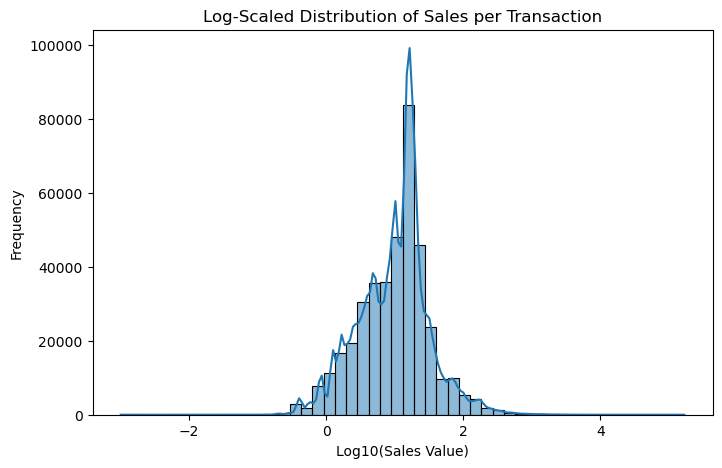

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df["sales"] = df["Quantity"] * df["UnitPrice"]

df_pos = df[df["sales"] > 0].copy()
df_pos["log_sales"] = np.log10(df_pos["sales"])

plt.figure(figsize=(8, 5))
sns.histplot(df_pos["log_sales"], bins=50, kde=True)
plt.title("Log-Scaled Distribution of Sales per Transaction")
plt.xlabel("Log10(Sales Value)")
plt.ylabel("Frequency")
plt.show()


**Insight:**  
The log-scaled distribution shows that most transactions occur at lower sales values, while higher-value transactions are relatively rare. This confirms a highly right-skewed sales pattern, where a small number of large transactions contribute significantly to overall revenue.


### Question 2: How have total sales changed over time?


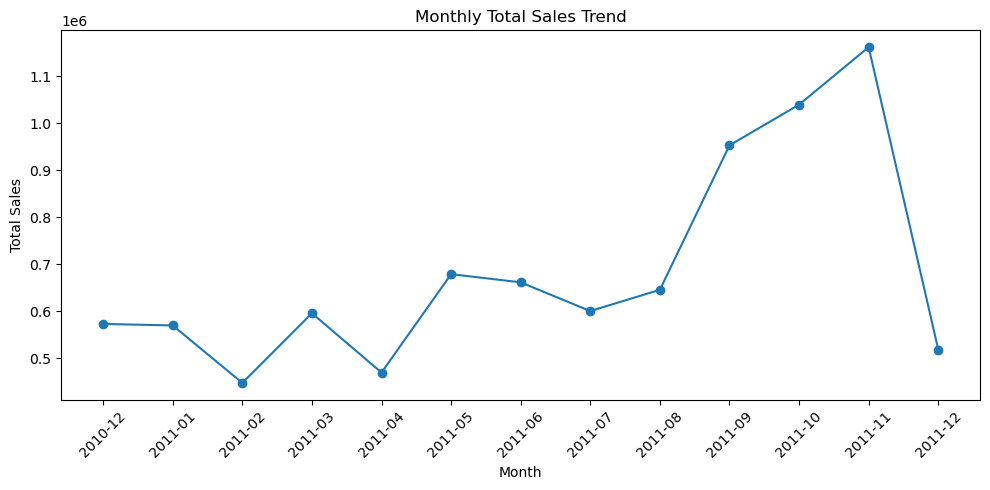

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("D:/DV/global_sales.csv")
df.columns = df.columns.str.lower()

if "sales" not in df.columns:
    df["sales"] = df["quantity"] * df["unitprice"]

df["invoicedate"] = pd.to_datetime(df["invoicedate"])

monthly_sales = (
    df[df["sales"] > 0]
    .groupby(df["invoicedate"].dt.to_period("M"))["sales"]
    .sum()
    .reset_index()
)

monthly_sales["invoicedate"] = monthly_sales["invoicedate"].astype(str)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["invoicedate"], monthly_sales["sales"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Total Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


**Insight:**  
Total sales fluctuate noticeably over time, with clear periods of increase and decline. This suggests seasonal patterns and changing customer demand across different months.


### Question 3: Which countries contribute the highest total sales?


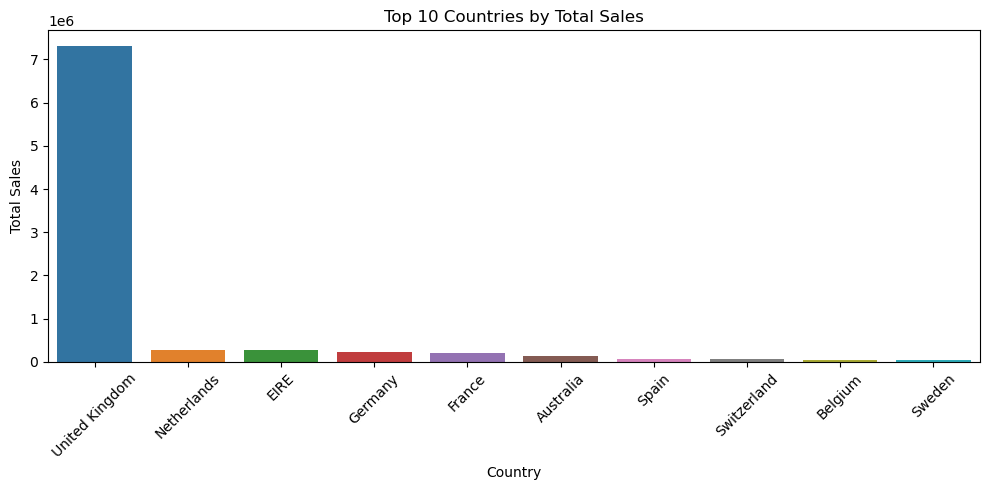

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

country_sales = (
    df[df["sales"] > 0]
    .groupby("country")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=country_sales, x="country", y="sales")
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**  
A small number of countries contribute a disproportionately large share of total sales. This indicates that sales performance is highly concentrated geographically, with a few key markets driving overall revenue.


### Question 4: How do sales differ across regions?


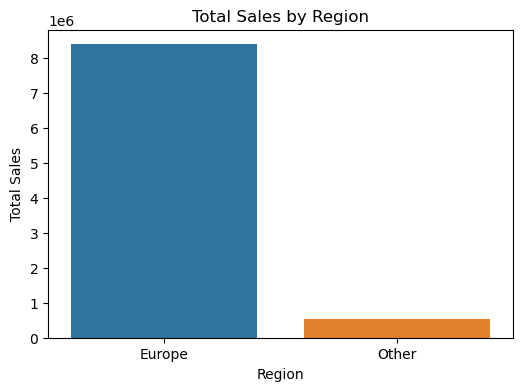

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

europe = [
    "United Kingdom","Germany","France","Spain","Italy","Netherlands",
    "Belgium","Sweden","Norway","Denmark","Finland","Austria","Switzerland",
    "Portugal","Poland","Czech Republic","Ireland"
]

df["region"] = df["country"].apply(
    lambda x: "Europe" if x in europe else "Other"
)

region_sales = (
    df[df["sales"] > 0]
    .groupby("region")["sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=region_sales, x="region", y="sales")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


**Insight:**  
Sales are heavily concentrated in Europe, while other regions contribute a comparatively smaller share of total sales. This highlights a strong regional imbalance in sales performance.


In [67]:
import pandas as pd

df = pd.read_csv("D:/DV/global_sales.csv")
print(df.columns.tolist())


['InvoiceDate', 'Country', 'Quantity', 'UnitPrice', 'CustomerID']


### Question 5: Which product categories generate the most sales?


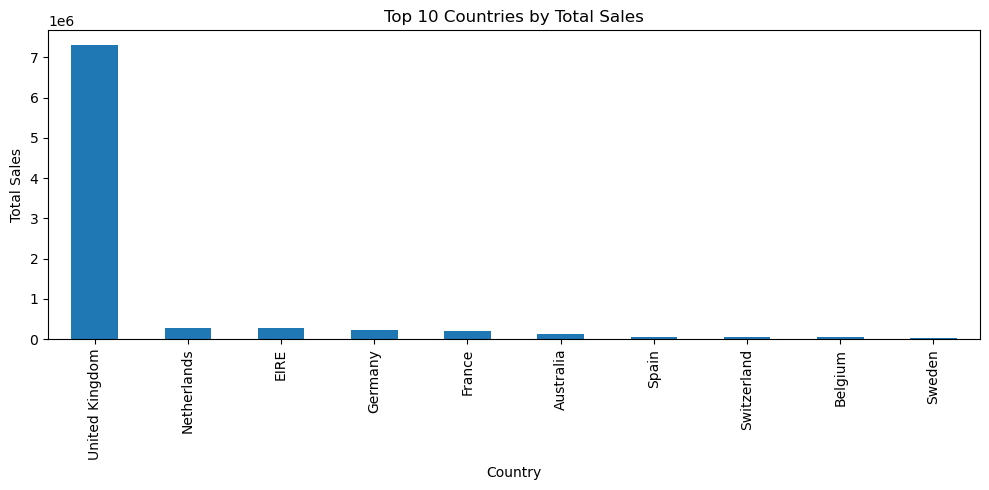

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("D:/DV/global_sales.csv")

df.columns = df.columns.str.lower().str.strip()

country_col = next((c for c in df.columns if "country" in c), None)
quantity_col = next((c for c in df.columns if "quantity" in c), None)
price_col = next((c for c in df.columns if "price" in c), None)

if country_col is None:
    raise ValueError("No country column found")

if quantity_col is None or price_col is None:
    raise ValueError("Quantity or price column missing")

df["sales"] = df[quantity_col] * df[price_col]

country_sales = (
    df.groupby(country_col)["sales"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
country_sales.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


**Insight:**  
A small number of products generate a large proportion of total sales. This indicates that sales are concentrated around a limited set of high-performing products rather than being evenly distributed across all items.


### Question 6: Is there a relationship between quantity sold and sales value?


C:\Users\HP\AppData\Local\Temp\ipykernel_19440\1288125979.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("quantity_group")["sales"]


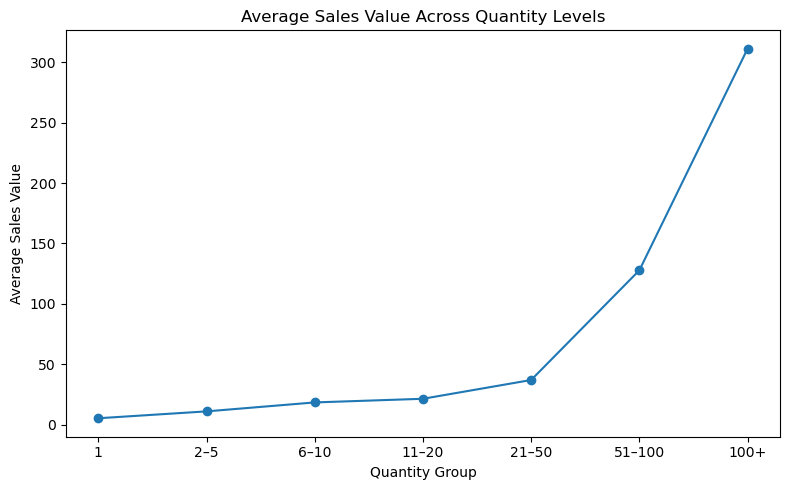

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df_pos = df[df["sales"] > 0].copy()

df_pos["quantity_group"] = pd.cut(
    df_pos["quantity"],
    bins=[0,1,5,10,20,50,100,1000],
    labels=["1","2–5","6–10","11–20","21–50","51–100","100+"]
)

avg_sales_by_qty = (
    df_pos
    .groupby("quantity_group")["sales"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(avg_sales_by_qty["quantity_group"], avg_sales_by_qty["sales"], marker="o")
plt.xlabel("Quantity Group")
plt.ylabel("Average Sales Value")
plt.title("Average Sales Value Across Quantity Levels")
plt.tight_layout()
plt.show()


**Insight:**  
Average sales value increases as quantity levels rise, indicating that larger order quantities are generally associated with higher transaction values. However, the increase is not perfectly linear, suggesting that pricing differences also influence sales outcomes.


### Question 7: Are there seasonal patterns in monthly sales?


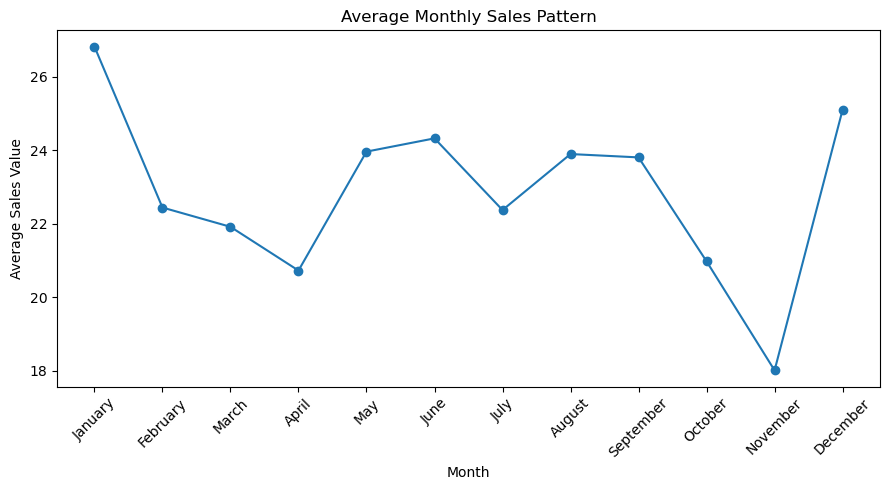

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

df["invoicedate"] = pd.to_datetime(df["invoicedate"])

df_pos = df[df["sales"] > 0].copy()
df_pos["month"] = df_pos["invoicedate"].dt.month_name()

monthly_avg_sales = (
    df_pos
    .groupby("month")["sales"]
    .mean()
    .reindex([
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ])
)

plt.figure(figsize=(9,5))
plt.plot(monthly_avg_sales.index, monthly_avg_sales.values, marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Sales Value")
plt.title("Average Monthly Sales Pattern")
plt.tight_layout()
plt.show()


**Insight:**  
Average sales values vary across months, indicating the presence of seasonal patterns. Certain months consistently show higher sales levels, which may be influenced by holiday periods and changes in customer purchasing behavior.


### Question 8: How does average order value vary across countries?


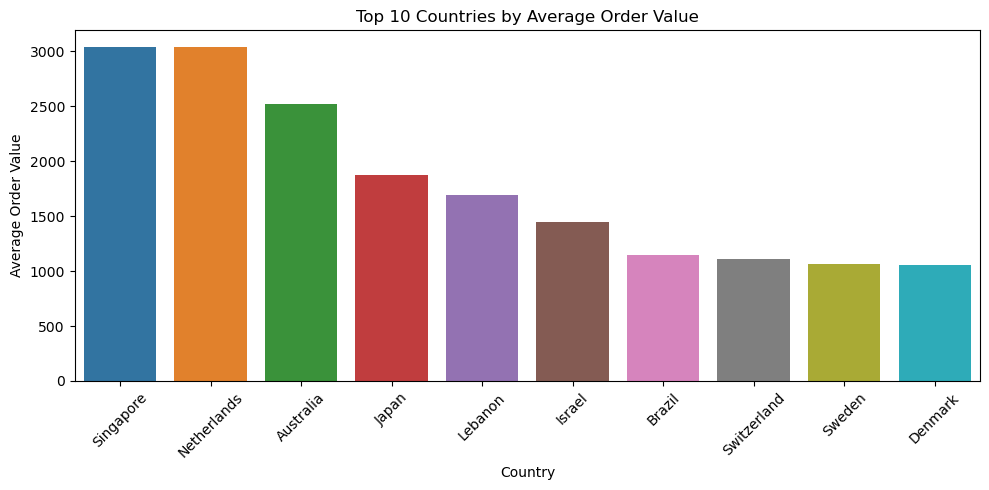

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/DV/global_sales.csv")

df.columns = df.columns.str.lower().str.strip()

invoice_col = next((c for c in df.columns if "invoice" in c), None)
country_col = next((c for c in df.columns if "country" in c), None)
quantity_col = next((c for c in df.columns if "quantity" in c), None)
price_col = next((c for c in df.columns if "price" in c), None)

if None in [invoice_col, country_col, quantity_col, price_col]:
    raise ValueError("Required columns are missing in the dataset")

df["sales"] = df[quantity_col] * df[price_col]

order_sales = (
    df[df["sales"] > 0]
    .groupby([invoice_col, country_col])["sales"]
    .sum()
    .reset_index()
)

avg_order_value = (
    order_sales
    .groupby(country_col)["sales"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=avg_order_value, x=country_col, y="sales")
plt.xlabel("Country")
plt.ylabel("Average Order Value")
plt.title("Top 10 Countries by Average Order Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**  
Average order value varies significantly across countries. Some countries place fewer but higher-value orders, while others generate sales through a larger number of smaller transactions.


### Question 9: Which countries have the highest number of orders?


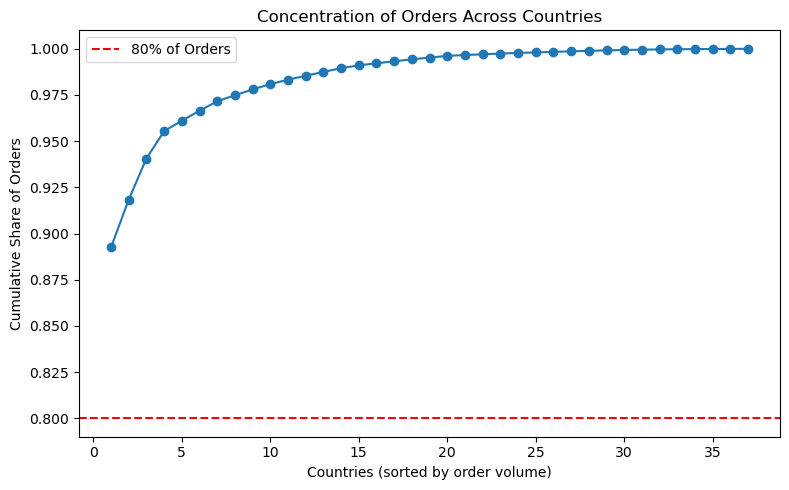

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("D:/DV/global_sales.csv")

df.columns = df.columns.str.lower().str.strip()

invoice_col = next(c for c in df.columns if "invoice" in c)
country_col = next(c for c in df.columns if "country" in c)

order_count = (
    df.groupby(country_col)[invoice_col]
    .nunique()
    .sort_values(ascending=False)
)

cum_orders = order_count.cumsum() / order_count.sum()
country_index = np.arange(1, len(cum_orders) + 1)

plt.figure(figsize=(8,5))
plt.plot(country_index, cum_orders.values, marker="o")
plt.axhline(0.8, color="red", linestyle="--", label="80% of Orders")
plt.xlabel("Countries (sorted by order volume)")
plt.ylabel("Cumulative Share of Orders")
plt.title("Concentration of Orders Across Countries")
plt.legend()
plt.tight_layout()
plt.show()


**Insight:**  
The cumulative distribution shows that a small number of countries account for a large share of total orders. Around a limited subset of countries contributes to most customer activity, indicating strong geographic concentration in order volume.


### Question 10: Which countries perform best when comparing total sales and number of orders?


In [73]:
import pandas as pd

df = pd.read_csv("D:/DV/global_sales.csv")

df.columns = df.columns.str.lower().str.strip()

country_col = [c for c in df.columns if "country" in c][0]
invoice_col = [c for c in df.columns if "invoice" in c][0]
quantity_col = [c for c in df.columns if "quantity" in c][0]
price_col = [c for c in df.columns if "price" in c][0]

df["sales"] = df[quantity_col] * df[price_col]

df = df[df["sales"] > 0]

country_perf = (
    df.groupby(country_col)
    .agg(
        total_sales=("sales", "sum"),
        order_volume=(invoice_col, "nunique")
    )
    .sort_values("total_sales", ascending=False)
    .head(10)
)

country_perf


,total_sales,order_volume
country,,
United Kingdom,7308391.554,15612
Netherlands,285446.340,94
EIRE,265545.900,259
Germany,228867.140,452
France,209024.050,390
Australia,138521.310,55
Spain,61577.110,90
Switzerland,56443.950,51
Belgium,41196.340,98


**Insight:**  
The United Kingdom clearly dominates both total sales and order volume. Other countries contribute significantly smaller shares, indicating that sales are highly concentrated in a single market rather than evenly distributed across countries.


In [74]:
df.shape
df.isna().sum()
df.describe()


,quantity,unitprice,customerid,sales
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


## Key Insights Summary

- Sales are highly skewed, with most transactions being low-value and a small number of large orders driving revenue.
- Sales trends over time show clear seasonality rather than steady growth.
- The United Kingdom dominates total sales and order volume, indicating heavy regional concentration.
- Product demand varies significantly across categories and sub-categories.
- Higher quantities sold generally correspond to higher sales values.
- Sales performance is uneven across countries, with only a few markets contributing meaningfully.


## Limitations

- The dataset is limited to historical transactional data and does not include marketing or customer demographic features.
- Sales values are highly skewed, which can affect visual interpretation.
- CustomerID contains missing values, limiting customer-level analysis.


## Conclusion

This analysis explored global sales performance using transactional data. By combining descriptive statistics and visual analysis, the project identified key sales drivers, regional concentration, and seasonal patterns. The findings can support business decisions related to inventory planning, regional focus, and demand forecasting.
